11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 32ms/step - accuracy: 0.9004 - loss: 0.3259 - val_accuracy: 0.9868 - val_loss: 0.0475
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9839 - loss: 0.0506 - val_accuracy: 0.9888 - val_loss: 0.0362
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9897 - loss: 0.0337 - val_accuracy: 0.9917 - val_loss: 0.0319
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9924 - loss: 0.0240 - val_accuracy: 0.9908 - val_loss: 0.0304
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9942 - loss: 0.0171 - val_accuracy: 0.9880 - val_loss: 0.0413
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9840 - loss: 0.0531
Test accuracy: 0.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


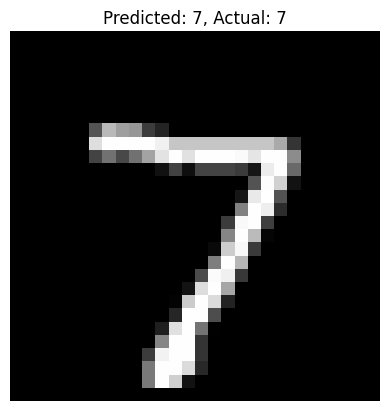

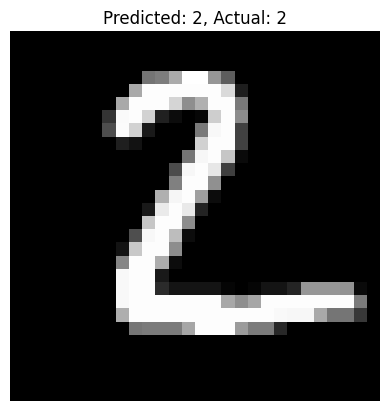

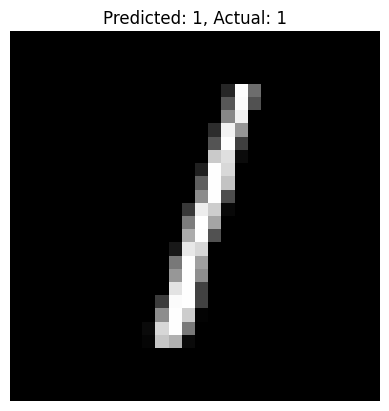

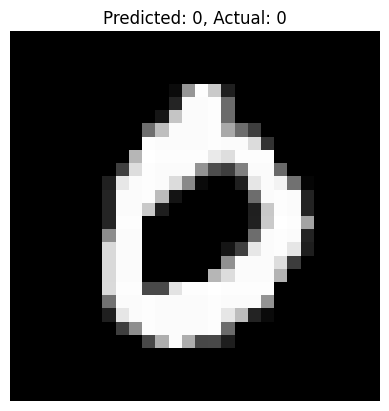

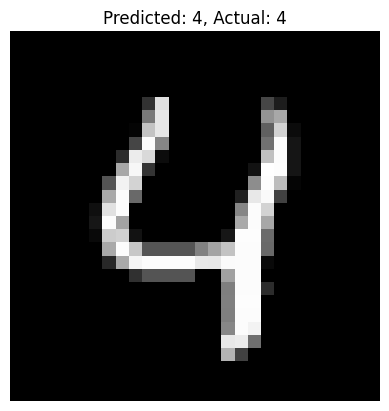

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1. Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Normalize pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# 3. Add channel dimension (for CNN input)
X_train = X_train[..., tf.newaxis]  # shape becomes (28, 28, 1)
X_test = X_test[..., tf.newaxis]

# 4. Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# 5. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 6. Train the model
model.fit(X_train, y_train, epochs=5, validation_split=0.1)

# 7. Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

# 8. Predict on a few test images
predictions = model.predict(X_test[:5])

# Show the predictions and the images
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {tf.argmax(predictions[i]).numpy()}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()
